### Import Required Libraries

In [37]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [38]:
X, y = load_wine(return_X_y=True)

Split Datasets

In [39]:
##Get indexes of the samples for each wine color
indices_color_0 = [i for i, label in enumerate(y) if label == 0]
indices_color_1 = [i for i, label in enumerate(y) if label == 1]
indices_color_2 = [i for i, label in enumerate(y) if label == 2]

##Split indexes for training and validation by wine color
train_indices_color_0, val_indices_color_0 = train_test_split(indices_color_0, test_size=0.2, random_state=21)
train_indices_color_1, val_indices_color_1 = train_test_split(indices_color_1, test_size=0.2, random_state=21)
train_indices_color_2, val_indices_color_2 = train_test_split(indices_color_2, test_size=0.2, random_state=21)

##Concatenate de indexes sets for global training and validation
train_indices = train_indices_color_0 + train_indices_color_1 + train_indices_color_2
val_indices = val_indices_color_0 + val_indices_color_1 + val_indices_color_2

##Get training and validation datasets
X_train, y_train = X[train_indices], y[train_indices]
X_val, y_val = X[val_indices], y[val_indices]

### Model Fitting

Define Model Topology

In [40]:
model = Sequential()
model.add(Dense(32, input_shape=(13,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
####model.build(input_shape=(None, 13))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                448       
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 3)                 51        
                                                                 
Total params: 1027 (4.01 KB)
Trainable params: 1027 (4.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training

In [41]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/200
5/5 [==============================] - 1s 58ms/step - loss: 174.2016 - accuracy: 0.3333 - val_loss: 179.5527 - val_accuracy: 0.3243
Epoch 2/200
5/5 [==============================] - 0s 14ms/step - loss: 151.5592 - accuracy: 0.3333 - val_loss: 154.2424 - val_accuracy: 0.3243
Epoch 3/200
5/5 [==============================] - 0s 13ms/step - loss: 130.1717 - accuracy: 0.3333 - val_loss: 130.4055 - val_accuracy: 0.3243
Epoch 4/200
5/5 [==============================] - 0s 11ms/step - loss: 109.5675 - accuracy: 0.3333 - val_loss: 107.8423 - val_accuracy: 0.3243
Epoch 5/200
5/5 [==============================] - 0s 15ms/step - loss: 90.2430 - accuracy: 0.3333 - val_loss: 85.9346 - val_accuracy: 0.3243
Epoch 6/200
5/5 [==============================] - 0s 12ms/step - loss: 70.7058 - accuracy: 0.3333 - val_loss: 64.9681 - val_accuracy: 0.3243
Epoch 7/200
5/5 [==============================] - 0s 15ms/step - loss: 52.7491 - accuracy: 0.3333 - val_loss: 44.2748 - val_accuracy: 0.324

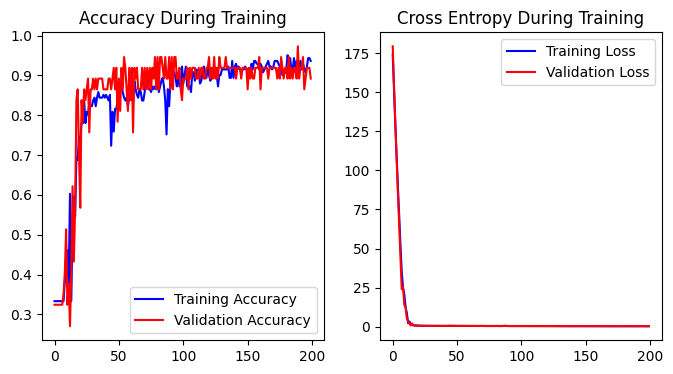

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch = range(len(acc))

loss = history.history['loss']
val_loss = history.history['val_loss']

f, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].plot(epoch, acc, 'blue', label='Training Accuracy')
ax[0].plot(epoch, val_acc, 'red', label='Validation Accuracy')
ax[0].set_title("Accuracy During Training")
ax[0].legend()
ax[1].plot(epoch, loss, 'blue', label='Training Loss')
ax[1].plot(epoch, val_loss, 'red', label='Validation Loss')
ax[1].set_title("Cross Entropy During Training")
ax[1].legend()
plt.show()

In [43]:
y_pred_train = model.predict(X_train)
y_pred_train_labels = []

for i in range(len(y_pred_train)):
  y_pred_train_labels.append(np.argmax(y_pred_train[i]))

5/5 [==============================] - 0s 3ms/step


In [44]:
loss, accuracy = model.evaluate(X_train, y_train)

print(f'Training Loss: {loss:.2f}')
print(f'Training Accuracy: {accuracy:.4f}')

5/5 [==============================] - 0s 2ms/step - loss: 0.1934 - accuracy: 0.9504
Training Loss: 0.19
Training Accuracy: 0.9504


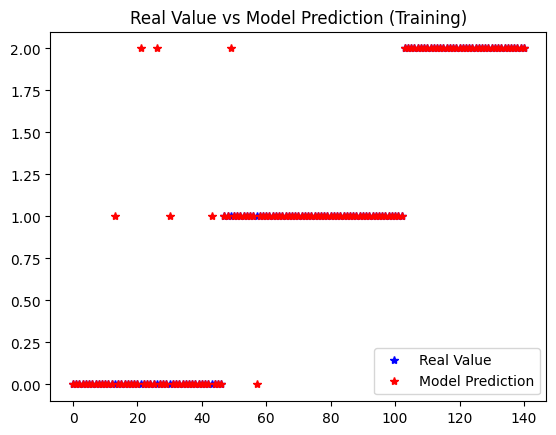

In [45]:
plt.figure()
plt.title("Real Value vs Model Prediction (Training)")
plt.plot(y_train, '*b', label='Real Value')
plt.plot(y_pred_train_labels, '*r', label='Model Prediction')
plt.legend()
plt.show()

### Model Validation

In [46]:
y_pred = model.predict(X_val)
y_pred_labels = []

for i in range(len(y_pred)):
  y_pred_labels.append(np.argmax(y_pred[i]))

2/2 [==============================] - 0s 10ms/step


In [47]:
loss, accuracy = model.evaluate(X_val, y_val)

print(f'Validation Loss: {loss:.2f}')
print(f'Validation Accuracy: {accuracy:.4f}')

2/2 [==============================] - 0s 10ms/step - loss: 0.2830 - accuracy: 0.8919
Validation Loss: 0.28
Validation Accuracy: 0.8919


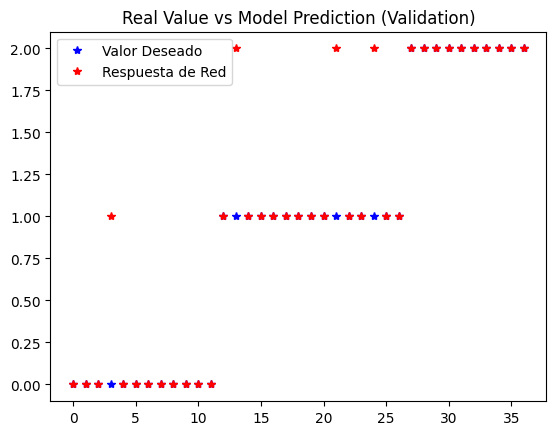

In [48]:
plt.figure()
plt.title("Real Value vs Model Prediction (Validation)")
plt.plot(y_val, '*b', label='Valor Deseado')
plt.plot(y_pred_labels, '*r', label='Respuesta de Red')
plt.legend()
plt.show()